In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [18]:
weights_directory = "Weights/"

dataset_directory = "Detected_Data/Plate/"

optimizer_name = 'adam'

In [19]:
batch_size = 4
image_height = 128
image_width = 128

In [20]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [21]:
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.35))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 128)      

In [22]:
model.compile(loss='binary_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])


model_name = weights_directory+optimizer_name+"_Truck_Plate_Model"

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint(model_name+'.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [23]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator()

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        dataset_directory,  # this is the target directory
        target_size=(image_height, image_width),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        dataset_directory,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')


Found 985 images belonging to 2 classes.
Found 985 images belonging to 2 classes.


In [24]:
model.fit_generator(
        train_generator,
        steps_per_epoch=800 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=20 // batch_size,
        callbacks=[early_stopping, mcp_save, TQDMNotebookCallback()])


Epoch 1/50


200/200 [==============================] - 457s 2s/step - loss: 0.4205 - acc: 0.8725 - val_loss: 0.0066 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00662, saving model to Weights/adam_Truck_Plate_Model.h5
Epoch 2/50


200/200 [==============================] - 429s 2s/step - loss: 0.1859 - acc: 0.9525 - val_loss: 0.0533 - val_acc: 1.0000

Epoch 00002: val_loss did not improve from 0.00662
Epoch 3/50


200/200 [==============================] - 439s 2s/step - loss: 0.0981 - acc: 0.9750 - val_loss: 0.3125 - val_acc: 0.9000

Epoch 00003: val_loss did not improve from 0.00662
Epoch 4/50


200/200 [==============================] - 439s 2s/step - loss: 0.1888 - acc: 0.9687 - val_loss: 0.0149 - val_acc: 1.0000

Epoch 00004: val_loss did not improve from 0.00662
Epoch 5/50


200/200 [==============================] - 462s 2s/step - loss: 0.1404 - acc: 0.9725 - val_loss: 0.0575 - val_acc: 1.0000

Epoch 00005: val_loss did not improve from 0.00662
Epoch 6/50


200/200 [==============================] - 428s 2s/step - loss: 0.0821 - acc: 0.9787 - val_loss: 0.2020 - val_acc: 0.9500

Epoch 00006: val_loss did not improve from 0.00662
Epoch 00006: early stopping



In [25]:
batch_size = 16

generator = test_datagen.flow_from_directory(
            dataset_directory,
            target_size=(image_height, image_width),
            batch_size=batch_size,
            class_mode=None,  # this means our generator will only yield batches of data, no labels
            shuffle=False)  # our data will be in order, so all first 1000 images will be cats, then 1000 dogs
# the predict_generator method returns the output of a model, given
# a generator that yields batches of numpy data



Found 985 images belonging to 2 classes.


In [29]:
from keras.models import load_model

loaded_model = load_model(weights_directory+"adam_Truck_Plate_Model.h5")

In [30]:
bottleneck_features_train = loaded_model.predict_generator(generator)


In [31]:
score = loaded_model.evaluate_generator(validation_generator)

print("Loss: "+str(score[0]))
print("Accuracy: "+str(score[1]))

Loss: 0.2452173480697846
Accuracy: 0.9431472081218274


In [32]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import xml.etree.ElementTree as ET
import numpy as np
#import plaidml.keras
import PIL.Image as Image
#plaidml.keras.install_backend()

/opt/conda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
from keras.models import load_model


image_height=128
image_width=128

weights_directory = "Weights/"

loaded_model = load_model(weights_directory+"adam_Truck_Plate_Model.h5")

In [34]:
# Malisiewicz et al.
def non_max_suppression_fast(boxes, overlapThresh,probs):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    #if boxes.dtype.kind == "i":
        #boxes = boxes.astype("float")

    # initialize the list of picked indexes
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the scores
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(probs)

    # keep looping while some indexes still remain in the indexes
    # list
    
    final_boxes = []
    while len(idxs) > 0:
        #print('hi')
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
        np.where(overlap > overlapThresh)[0])))

        # return only the bounding boxes that were picked using the
        # integer data type
        #eturn boxes[pick].astype("int")
        final_boxes.append(boxes[pick])
        #print(boxes[pick])
    return boxes[pick]

In [43]:
def rcnn(image):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    ss.switchToSelectiveSearchFast()
    results = ss.process()
    copy = image.copy()
    copy2 = image.copy()
    positive_boxes = []
    probs = []
    num_boxes = 0
    
    for box in results:
        x1 = box[0]
        y1 = box[1]
        x2 = box[0]+box[2]
        y2 = box[1]+box[3]
        
        roi = image.copy()[y1:y2,x1:x2]       
        roi = cv2.resize(roi,(image_height, image_width))
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        roi = roi * 1/255.0

        roi_use = roi.reshape((1,image_height, image_width, 3))
        class_pred = model.predict_classes(roi_use)
        
        cv2.imshow("frame", roi_use[0])
        cv2.waitKey(1000)
        #if class_pred == 1:
        prob_type = model.predict(roi_use)[0].argmax()
        prob_value = model.predict(roi_use)[0].max()        
        if prob_type == 1 and prob_value > 0.5:
            print(prob_type)
            print(prob_value)
            positive_boxes.append([x1,y1,x2,y2])
            probs.append(prob_value)
            cv2.rectangle(copy2,(x1,y1),(x2,y2),(255,0,0),5)
        num_boxes+=1
        
        if num_boxes > 1000:
            break
    
    if probs == []:
        return
    
    cleaned_boxes = non_max_suppression_fast(np.array(positive_boxes),0.1,probs)
    total_boxes = 0
    for clean_box in cleaned_boxes:
        clean_x1 = clean_box[0]
        clean_y1 = clean_box[1]
        clean_x2 = clean_box[2]
        clean_y2 = clean_box[3]
        total_boxes+=1
        cv2.rectangle(copy,(clean_x1,clean_y1),(clean_x2,clean_y2),(0,255,0),3)
    
    plt.imshow(copy)

KeyboardInterrupt: 

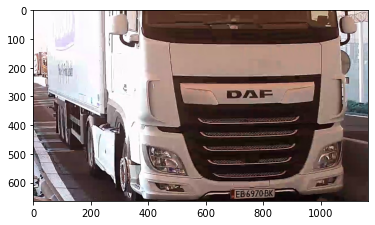

In [44]:
test_img = cv2.imread('test/1.jpg')
plt.imshow(test_img)
rcnn(image=test_img)